# CZ1015-Mini-Project
This repository contains the jupyter notebook for classifying whether an epileptic patient is having a seizure or not, through EEG readings, along with raw data and processed datasets.

# Introduction
Epilepsy is the most common chronical disorder affecting nearly 50 million people worldwide. It is associated with periodic loss of consciousness characterized by recurrent seizures, convulsions and an abnormal electrical activity of the brain. EEG, which is the recording of electrical activity of the brain signals, can be used to diagnose the epilepsy condition.

This project will use binary classification methods to predict whether an individual is having a seizure from the EEG at a point in time.


# Dataset
The original dataset came from the UCI Machine Learning Repository: (https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)

This dataset records the electroencephalogram (EEG) readings of 500 individuals, classified into 4097 different data readings divided into 23 chunks per individual. Thus, there are 23 x 500 = 11,500 rows of information. Each row has 178 columns representing EEG readings taking place over 1 second. Column 179 represents the label y, which indicates if the patient is having a seizure {1} or not {2,3,4,5}. 




# Problem Statement
We would like to find out how we can best detect epilepsy. Taking our problem and looking at it from a Data science perspective, this is a classification problem, where we are classifying epilepsy cases and non-epilepsy cases. We extrapolated this problem and decided to determine the best model for detecting epilepsy using machine learning. Our metrics was based on classification accuracy and FNR. We set the FNR as an important variable because we want to minimise the number of undetected epilepsy. 


### This project was completed as a mini-project in CZ1015 by Zachary, Wilson, Chi Hui and Sabrina

# EEG Data Analysis as Time Series

## Table of Contents
- Practical Motivation 
- Data Preparation
- Exploratory Analysis 
- Observations

## Practical Motivation

> Real Life Problem: Can we detect epilepsy?

> Data Science Problem: What is the best model to classify epilepsy?
    > - What metrics should be used to determine the best model?

In order to best detect epilepsy given EEG seizure data, we chose **four** different models and ranked them in terms of 
**classification accuracy** and **false negative rate**. These metrics were chosen in order to 
<br />**1. determine which model made the most correct predictions**, and 
<br />**2. see which model best minimized the cases where a seizure went undetected.**

In [1]:
# import necessary libraries
from numpy import array

import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

## Data Preparation

In [2]:
#Import EEG data from csv file
df = pd.read_csv('data.csv')

In [3]:
df.head() # The dataset at a glance: note, 178 datapoints taking place over 1 second, y label.
            # y: 1 = Seizure activity

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
print(df.dtypes)

Unnamed: 0    object
X1             int64
X2             int64
X3             int64
X4             int64
               ...  
X175           int64
X176           int64
X177           int64
X178           int64
y              int64
Length: 180, dtype: object


- Drop the first label column that is not necessary to process the data
- Convert the 'y' label from (1,2,3,4,5) to 1 and 0. 
    - 1 represents epilepsy (case 1), 0 represents no epilepsy (case 2,3,4,5). We convert into 2 levels because we care about classifying **epilepsy vs no epilepsy**

In [5]:
#Drop the 1st col in the data set
df.drop(df.columns[0], axis=1, inplace=True)
#Change the result, y col to 1 or 0 (1-epilepsy, 0-no epilepsy)
df["y"] = df.y ==1
df["y"] = df["y"].astype(int)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


- Seperate dataframes are created for epilepsy and non-epilepsy data. Column y is dropped, leaving only points 1-178.
    - This is done so the data can be plotted.

In [6]:
#split the data to epilepsy and non epilepsy 
data_epilepsy = (df.loc[df['y'] == 1]).drop(['y'],axis=1)
data_no_epilepsy = (df.loc[df['y'] != 1]).drop(['y'],axis=1)

## Exploratory Analysis
- Observe trends between epilepsy and non-epilepsy data

### Statistical description of epilepsy data

In [7]:
data_epilepsy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,-21.936522,-19.049130,-15.293913,-9.836087,-3.707391,2.730000,6.899565,7.425652,8.380870,10.773913,...,-7.266522,-9.714783,-15.909565,-22.383043,-26.424783,-26.221739,-25.830870,-25.043913,-24.548261,-24.016522
std,342.361939,343.398782,337.489643,332.354833,332.211163,332.941638,332.899545,334.375084,334.534814,331.071853,...,342.095308,341.534693,345.740615,351.503084,351.184524,347.475865,339.650467,335.747017,335.244512,339.819309
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-193.250000,-191.250000,-187.000000,-184.000000,-174.250000,-169.000000,-162.000000,-156.250000,-157.000000,-154.000000,...,-187.250000,-178.250000,-180.000000,-188.000000,-195.000000,-203.000000,-195.000000,-192.000000,-190.250000,-189.000000
50%,-16.000000,-18.000000,-12.500000,-6.000000,-12.000000,-7.000000,0.000000,4.000000,8.500000,12.500000,...,-11.000000,-11.000000,-12.000000,-16.000000,-16.500000,-15.000000,-14.500000,-18.000000,-21.500000,-23.000000
75%,159.000000,168.250000,169.250000,166.250000,170.000000,175.000000,178.250000,175.000000,174.000000,176.250000,...,178.000000,174.000000,162.250000,159.250000,160.000000,159.250000,153.250000,150.000000,151.250000,157.250000
max,1314.000000,1356.000000,1274.000000,1226.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1398.000000,1419.000000,1413.000000,1319.000000,1186.000000,1129.000000,1205.000000,1371.000000,1445.000000,1380.000000


### Statistical description of non-epilepsy data

In [8]:
data_no_epilepsy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,...,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000
mean,-8.992609,-8.877174,-8.910435,-8.969783,-9.085326,-9.436848,-9.852500,-10.215326,-10.292717,-10.404022,...,-10.056957,-10.253478,-10.560543,-10.583587,-10.479891,-10.148696,-9.848587,-9.620435,-9.395435,-9.240435
std,70.455286,70.560110,70.372582,70.030409,69.377958,69.291403,69.555105,69.635977,69.139111,68.502271,...,69.856421,68.825267,68.028089,67.878426,68.128134,68.868079,69.550894,70.353607,70.934300,71.185850
min,-566.000000,-609.000000,-594.000000,-549.000000,-603.000000,-801.000000,-956.000000,-1092.000000,-784.000000,-769.000000,...,-646.000000,-609.000000,-590.000000,-597.000000,-584.000000,-571.000000,-570.000000,-594.000000,-563.000000,-559.000000
25%,-44.000000,-44.000000,-45.000000,-45.000000,-45.000000,-45.000000,-45.000000,-47.000000,-47.000000,-47.000000,...,-46.000000,-46.000000,-46.000000,-47.000000,-47.000000,-46.000000,-45.000000,-46.000000,-45.000000,-45.000000
50%,-7.000000,-7.000000,-7.000000,-8.000000,-8.000000,-9.000000,-9.000000,-9.000000,-8.000000,-8.000000,...,-8.000000,-9.000000,-9.500000,-10.000000,-10.000000,-9.000000,-9.000000,-8.000000,-9.000000,-8.000000
75%,26.000000,27.000000,28.000000,27.000000,27.000000,28.000000,27.000000,27.000000,27.000000,26.000000,...,27.000000,26.000000,25.000000,25.000000,26.000000,26.000000,27.000000,27.000000,27.000000,27.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1437.000000,1242.000000,1044.000000,868.000000,869.000000,1077.000000,...,2047.000000,1777.000000,1472.000000,1280.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


### Count of y(Epilepsy vs Non-Epilepsy)
> Observations: Data is unbalanced - will effect outcome of classification models (this will be addressed later).

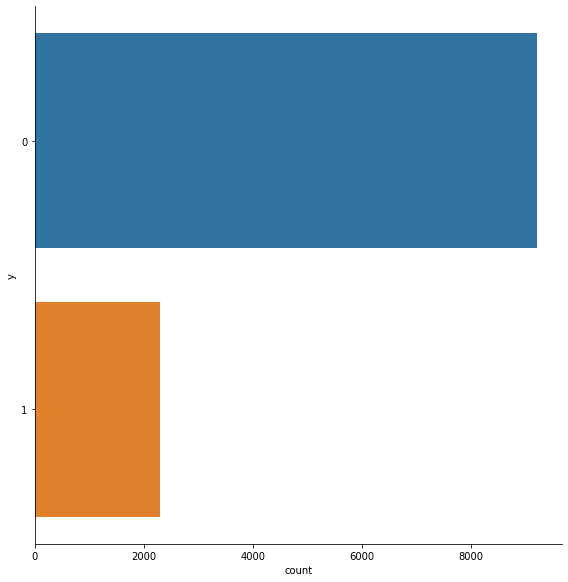

In [9]:
sb.catplot(y = 'y', data = df, kind = "count", height = 8)

### Data visualisation [ Time Series Data ]

In [10]:
#Plot 5 random time series data 
ran_ep = data_epilepsy.sample(n = 5) 
ran_no_ep = data_no_epilepsy.sample(n = 5) 

- Visualize the scale of the time series data. Plot them against each other in order to compare

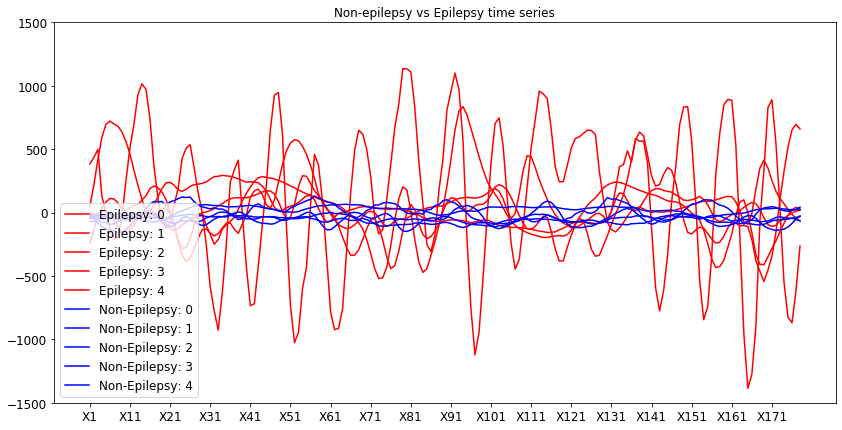

In [11]:
#Time series plot of 5 random epilepsy data
plt.figure(figsize=(14, 7))

for row  in range(len(ran_ep)):
    plt.plot(ran_ep.iloc[row],label='Epilepsy: '+str(row), color = 'red')


#Time series plot 5 random non epilepsy data

for row  in range(len(ran_no_ep)):
    plt.plot(ran_no_ep.iloc[row],label='Non-Epilepsy: '+str(row), color = 'blue')

plt.title('Non-epilepsy vs Epilepsy time series')
plt.tick_params(labelsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.xticks(np.arange(0, len(ran_no_ep.iloc[row])+1, 10)) # set x tick frequency
plt.ylim(-1500, 1500)

plt.show()


> Observations: 
> - Variance of epilepsy is higher when compared to non-epilepsy.
> - Scalewise, epilepsy is more extreme.

### Rolling mean of Epilepsy and Non-Epilepsy Data

> Using rolling mean +- a constant, we can classify anomalies. Anomalies are points that lie outside that range. 
> - Our hypothesis: we will be able to classify epilepsy based on the number of anomalies.

In [12]:
#k is the constant to be added to the mean
#m is the multiple of sd to be added to the mean(function plotrmsd)
#w is the window

def plotrmconstant(data,k,w,label = ""):
    df_recent = data
    rroll_m = df_recent.rolling(window=w).mean() # Calculate the rolling mean for the dataset
    
    upperBound = rroll_m+k # Get the upper and lower bounds (rolling mean +- constant)
    lowerBound = rroll_m-k
    with np.errstate(invalid='ignore'): # will produce warnings due to comparison with NaN, can be ignored
        mask = np.logical_or(np.array(upperBound[:]) < np.array(df_recent[:]), 
                          np.array(df_recent[:]) < np.array(lowerBound[:]))
    plt.figure(figsize=(14, 7))
    
    #Plot the data
    plt.plot(df_recent.index, rroll_m, lw=1, alpha=0.8,label='Rolling mean ',color='blue')
    plt.fill_between(df_recent.index, lowerBound, upperBound, color='b', alpha=.1)
    plt.plot(df_recent.index, df_recent, lw=2, alpha=0.8,label='Actual',color='red')
    plt.plot(df_recent[mask], 'ro', label = "Anomaly") # plot anomalies

    plt.title(label + 'Rolling mean +/- {}'.format(k))
    plt.tick_params(labelsize=12)
    plt.legend(loc='lower left', fontsize=12)
    plt.xticks(np.arange(0, len(data)+1, 10)) # set x tick frequency
    plt.show()
    
def plotrmsd(data,m,w, label = ""):
    df_recent = data
    rroll_sd = df_recent.rolling(window=w).std()
    rroll_m = df_recent.rolling(window=w).mean() # Calculate the rolling mean for the dataset
    
    upperBound = rroll_m+m*rroll_sd # Get the upper and lower bounds (rolling mean +- constant)
    lowerBound = rroll_m-m*rroll_sd
    with np.errstate(invalid='ignore'): # will produce warnings due to comparison with NaN, can be ignored
        mask = np.logical_or(np.array(upperBound[:]) < np.array(df_recent[:]), 
                          np.array(df_recent[:]) < np.array(lowerBound[:]))
    plt.figure(figsize=(14, 7))
    
    #Plot the data
    plt.plot(df_recent.index, rroll_m, lw=1, alpha=0.8,label='Rolling mean ',color='blue')
    plt.fill_between(df_recent.index, lowerBound, upperBound, color='b', alpha=.1)
    plt.plot(df_recent.index, df_recent, lw=2, alpha=0.8,label='Actual',color='red')
    plt.plot(df_recent[mask], 'ro', label = "Anomaly") # plot anomalies

    plt.title(label + 'Rolling mean +/- {} SD'.format(m))
    plt.tick_params(labelsize=12)
    plt.legend(loc='lower left', fontsize=12)
    plt.xticks(np.arange(0, len(data)+1, 10)) # set x tick frequency
    plt.show()

### Example: showcasing +- constant versus +- multiple of SD
- Rolling mean +- rolling standard deviation was not used, as it fielded poorer results then rolling mean +- constant.
    - Elaborated upon in section on anomaly detection

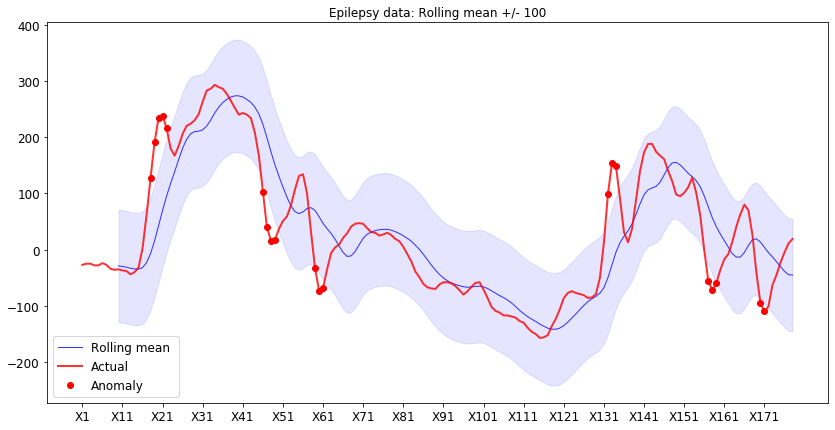

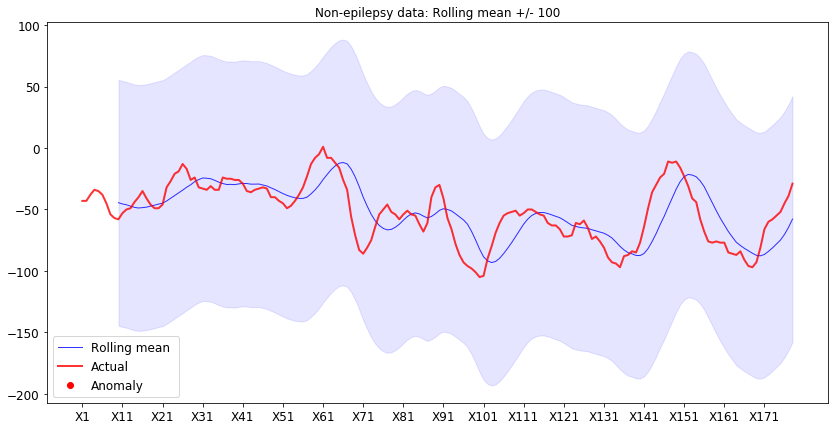

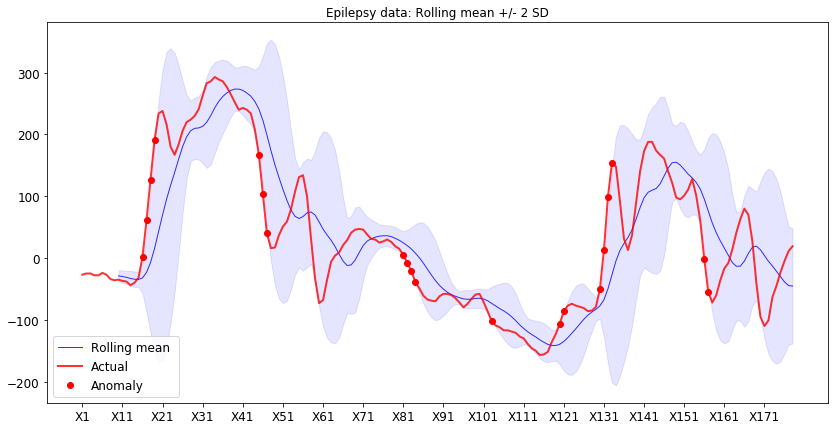

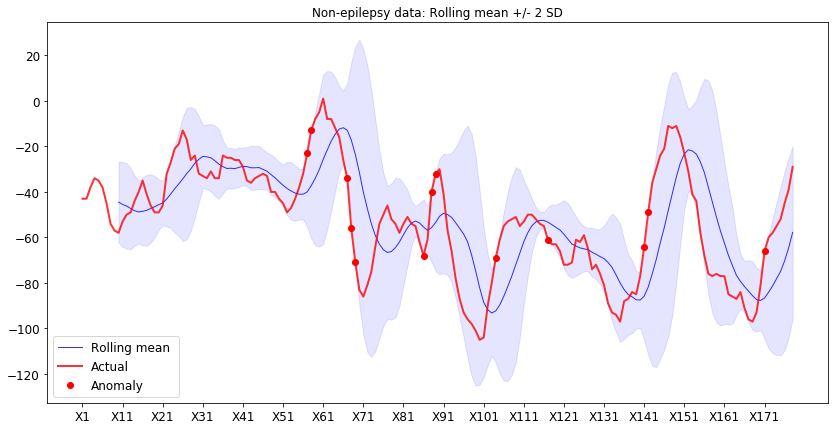

In [13]:
plotrmconstant(ran_ep.iloc[0],100,10, "Epilepsy data: ")
plotrmconstant(ran_no_ep.iloc[0],100,10, "Non-epilepsy data: ")
plotrmsd(ran_ep.iloc[0],2,10, "Epilepsy data: ")
plotrmsd(ran_no_ep.iloc[0],2,10, "Non-epilepsy data: ")

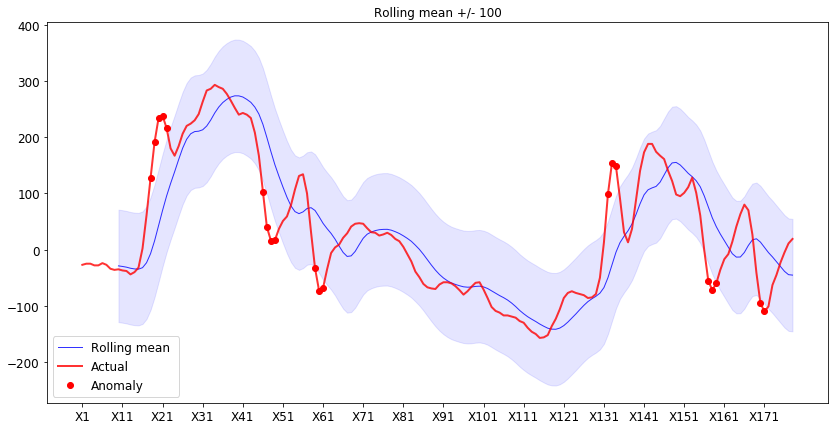

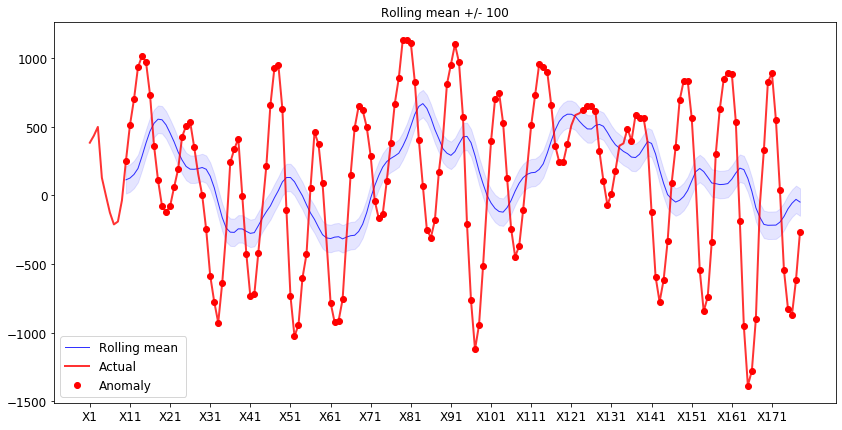

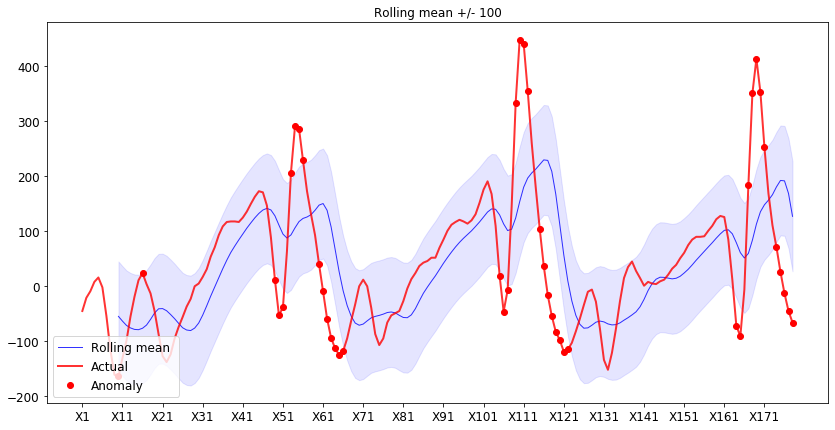

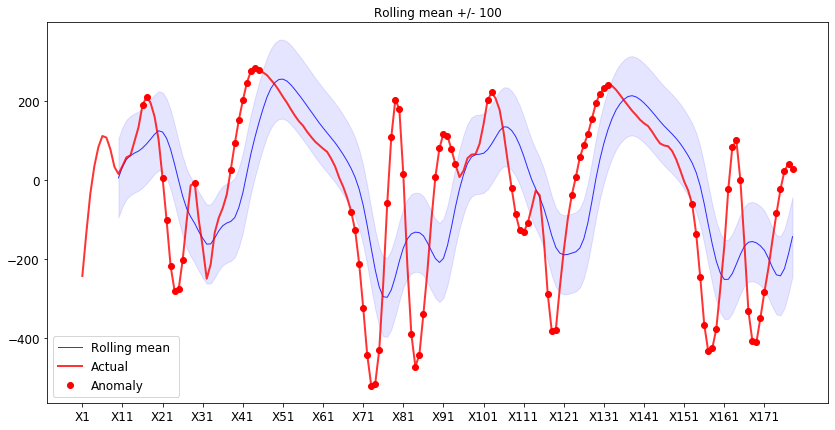

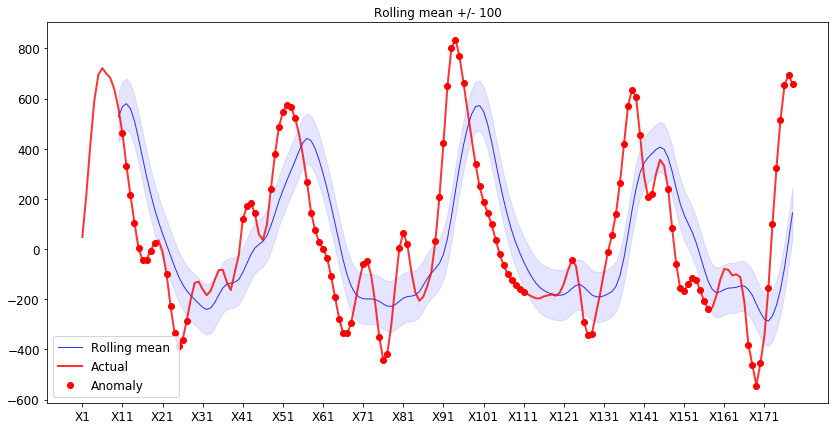

In [14]:
#Rolling mean plot epilepsy
for row  in range(len(ran_ep)):
    plotrmconstant(ran_ep.iloc[row],100,10)

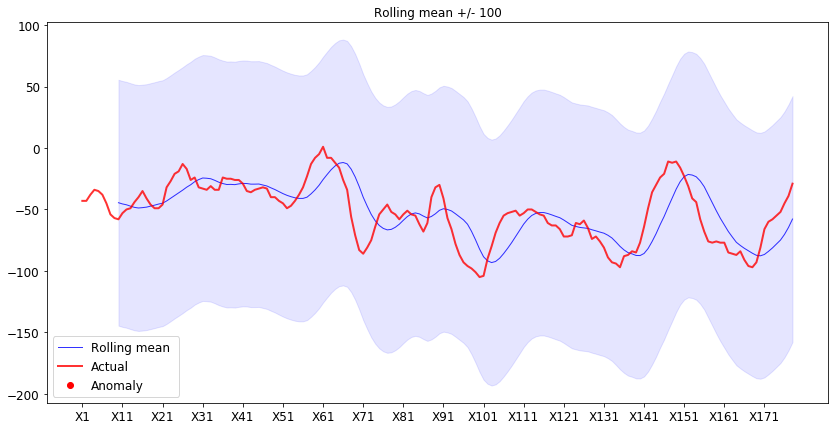

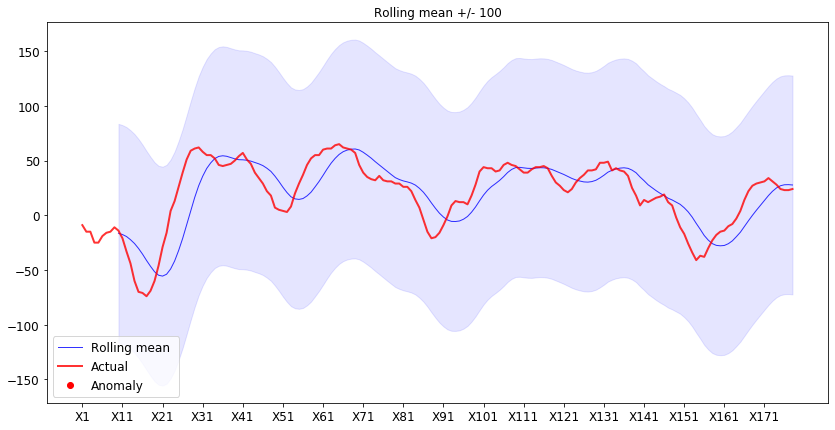

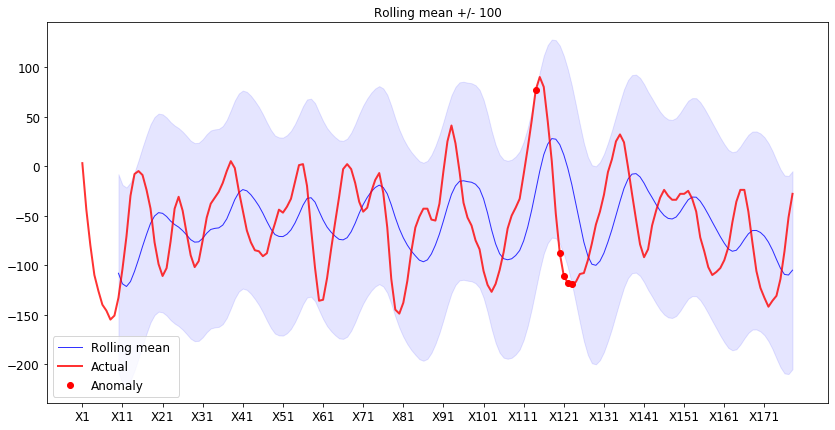

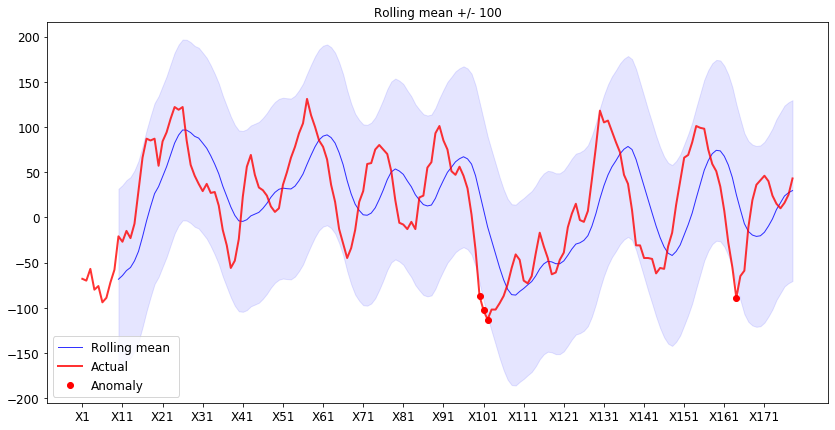

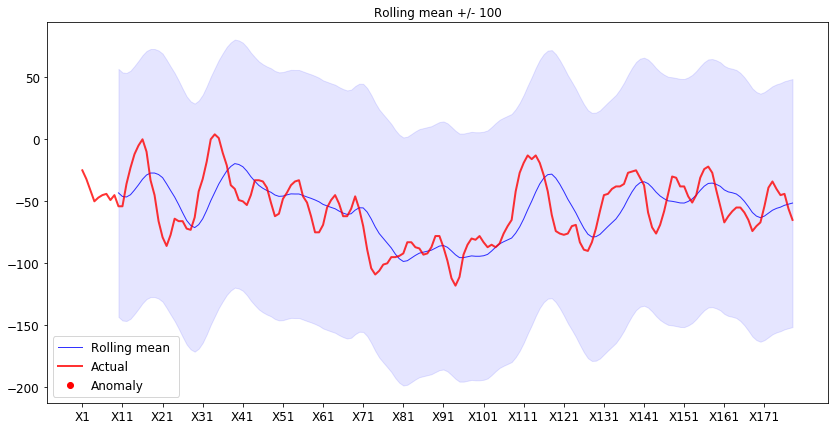

In [15]:
#Rolling mean plot no epilepsy
for row  in range(len(ran_no_ep)):
    plotrmconstant(ran_no_ep.iloc[row],100,10)

### Means of Rolling Means
> Extrapolating further on our hypothesis, by determining the averages of the rolling means of the dataset, can see the difference on average between epilepsy and no epilepsy.

([<matplotlib.axis.XTick at 0x1a20599890>,
 <a list of 18 Text xticklabel objects>)

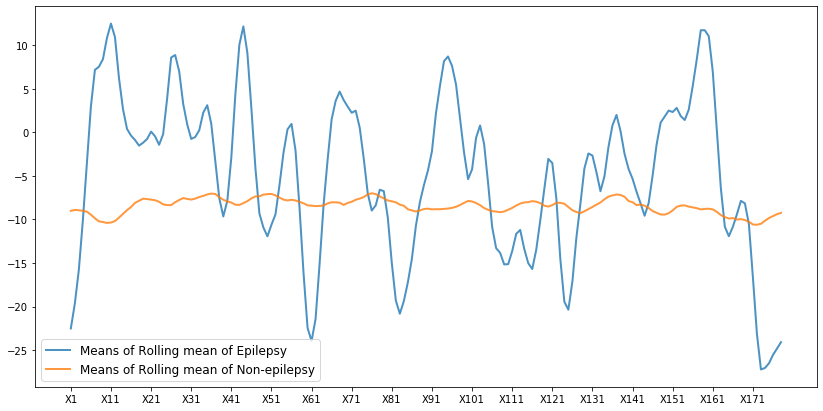

In [16]:
epilepsy_m = data_epilepsy.rolling(window=20).mean()
no_epilepsy_m = data_no_epilepsy.rolling(window=20).mean()

plt.figure(figsize=(14, 7))

mean_total_epilepsy = epilepsy_m.describe().loc['mean']
mean2_total_epilepsy = no_epilepsy_m.describe().loc['mean']
plt.plot(mean_total_epilepsy, lw=2, alpha=0.8,label='Means of Rolling mean of Epilepsy')
plt.plot(mean2_total_epilepsy, lw=2, alpha=0.8,label='Means of Rolling mean of Non-epilepsy')
plt.legend(loc='lower left', fontsize=12)
plt.xticks(np.arange(0, len(mean_total_epilepsy)+1, 10)) # set x tick frequency

> - As there is a large difference between the two, we predict that classification can be done successfully.

## Balancing the dataset
- The dataset is unbalanced: ratio of response variable to predictors is 1:4. 
- Using SMOTE, oversample the data to create a balanced dataset.
    - This will be done on the train set.

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

# Methods of Analysis
> As per the problem, four methods of classification were chosen. These are:
> - Anomaly Detection
> - Logistic Regression
> - Gradient Boosting
> - K-Nearest Neighbors

> In order to determine which method is the best, two metrics were identified: **Classification Accuracy** and **False Negative Rate**.
> - Classification Accuracy - in order to determine how well the method can classify epilepsy and non epilepsy.
> - False Negative Rate - the method should minimize the amount of undetected epilepsy (1's identified as 0)

In [18]:
# Function for calculating the FNR
def fnr_rate(y_train,y_test,y_train_pred,y_test_pred):
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train,y_train_pred).ravel() # extract TN, FP, FN, TP from train set
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_test_pred).ravel() # extract from test set
    fnr_train = fn1/(fn1+tp1)
    fnr_test = fn2/(fn2+tp2)
    return fnr_train, fnr_test # return the FNR for train and test set

### Anomaly detection
> **Defined functions:** 
> - anomaly_detect(*df_row*, *window*, *confidence*) : return a series of values outside a specified confidence level(constant)
> - anomaly_detect_sd(*df_row*, *window*, *confidence*) : return a series of values outside a specified confidence level(sd)
> - plot_with_anomalies(*df_row*, *window*, *confidence*) : plot a row with anomalies indicated
> - anomaly_table(*df*, *window*, *confidence_table*) : create a table of anomalies given specified confidence levels(constant)
> - anomaly_table(*df*, *window*, *confidence_table*) : create a table of anomalies given specified confidence levels(sd)

In [19]:
def anomaly_detect(df_row, window=20, confidence=100,count=False): #return a list of anomaly indices (+/- constant)
    if 'y' in df_row: # check if y row has not been removed
        df_row.drop(['y'], inplace=True)
    
    r_mean = df_row.rolling(window=window).mean().shift() #rolling mean
    upper = r_mean+confidence # upper bound = rolling mean + constant
    lower = r_mean-confidence # lower bound = rolling mean - constant
    with np.errstate(invalid='ignore'): # will produce errors due to comparison with NaN, we want to ignore those
        mask = np.logical_or(np.array(upper[:]) < np.array(df_row[:]), # create boolean mask
                          np.array(df_row[:]) < np.array(lower[:])) 
    
    anomalies = df_row[mask] # apply mask to series
    
    if count==False: return df_row[mask]
    else: return len(df_row[mask])

def anomaly_detect_sd(df_row, window=20, confidence=2,count=False): #return a list of anomaly indices (+/- multiple sd)
    if 'y' in df_row: # check if y row has not been removed
        df_row.drop(['y'], inplace=True)
    
    r_mean = df_row.rolling(window=window).mean().shift() #rolling mean
    r_sd= df_row.rolling(window=window).std().shift() #rolling standard deviation
    upper = r_mean+confidence*r_sd # upper bound = rolling mean + confidence*sd
    lower = r_mean-confidence*r_sd # lower bound = rolling mean - confidence*sd
    with np.errstate(invalid='ignore'): # will produce errors due to comparison with NaN, we want to ignore those
        mask = np.logical_or(np.array(upper[:]) < np.array(df_row[:]), # create boolean mask
                          np.array(df_row[:]) < np.array(lower[:])) 
    
    anomalies = df_row[mask] # apply mask to series
    
    if count==False: return df_row[mask]
    else: return len(df_row[mask])
    
def plot_with_anomalies(df_row, window=20, confidence=100,save=False):
    if 'y' in df_row:
        df_row.drop(['y'], inplace=True)
        
    r_mean = df_row.rolling(window=window).mean().shift() #rolling mean
    r_sd= df_row.rolling(window=window).std().shift() #rolling standard deviation
    upper = r_mean+confidence  # upper bound = rolling mean + constant
    lower = r_mean-confidence # lower bound = rolling mean - constant
    with np.errstate(invalid='ignore'):
        mask = np.logical_or(np.array(upper[:]) < np.array(df_row[:]), 
                          np.array(df_row[:]) < np.array(lower[:])) # will produce errors due to comparison with NaN, can be ignored
    plt.figure(figsize=(14, 7))
    plt.xticks(np.arange(0, len(df_row)+1, 10)) # set x tick frequency
    plt.plot(df_row.index, r_mean, lw=1, alpha=0.8,label='Rolling mean',color='blue') # Plot rolling mean
    plt.fill_between(df_row.index, lower, upper, color='b', alpha=.1) # plot confidence band
    plt.plot(df_row, lw=2, alpha=0.8,label='Actual',color='red') # plot actuals
    plt.plot(df_row[mask], 'ro', label = "Anomaly") # plot anomalies
    plt.xlabel ('Time')
    plt.ylabel ('Voltage(mV)',rotation=0)
    plt.title ('Anomaly Detection')
    
    if save==True:
        plt.savefig('anomaly detection.png', dpi=300) # save as image

def anomaly_table(df,window,confidence_table):
    table = pd.DataFrame()
    table['y'] = df['y']
    
    for i in confidence_table:
        table[str(i) + 'Distance Anomalies'] = df.apply(anomaly_detect, axis=1, args = (window,i,True)) # apply function to table
    return table

def anomaly_table_sd(df,window,confidence_table):
    table = pd.DataFrame()
    table['y'] = df['y']
    
    for i in confidence_table:
        table[str(i) + 'SD Anomalies'] = df.apply(anomaly_detect_sd, axis=1, args = (window,i,True)) # apply function to table
    return table

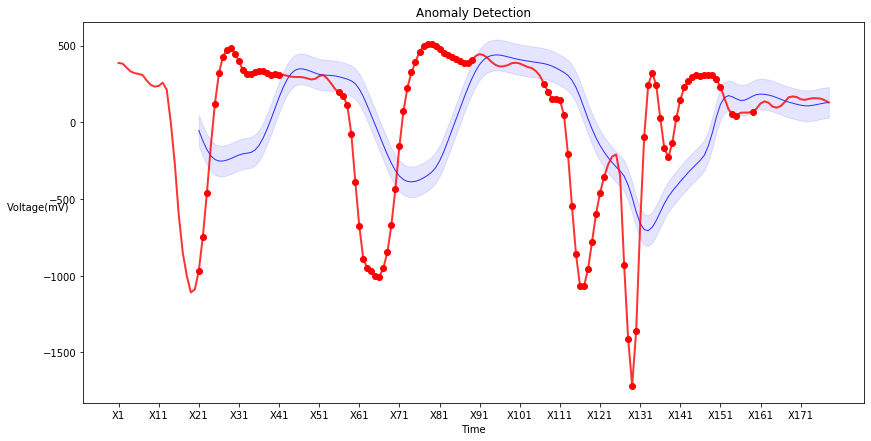

In [20]:
plot_with_anomalies(df.iloc[1,:], confidence = 100) # Example from an anomaly case

**Create a classification tree and plot the confusion matrix**

In [21]:
table = anomaly_table(df,20,[100]) # First, we create a table of anomalies based on the data (which we further split into train and test)
table2 = anomaly_table_sd(df,20,[3])
table.head()

,y,100Distance Anomalies
0,0,45
1,1,97
2,0,4
3,0,0
4,0,3


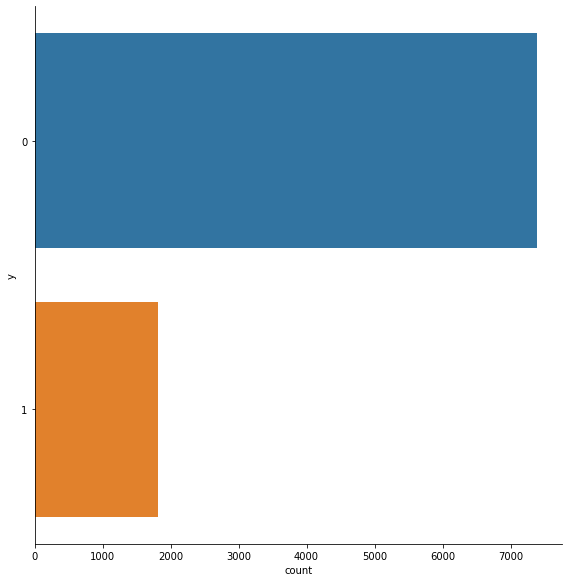

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x = table.drop(['y'],axis=1)
y = pd.DataFrame(table['y'])
y = np.array(y).ravel()

#Split the table into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.20) # create train and test set based on the anomaly table

df_test = pd.DataFrame(y_train, columns=["y"])
sb.catplot(y = 'y', data = df_test, kind = "count", height = 8)

- Dataset is very unbalanced.
- Balance the dataset using Synthetic Minority Over-sampling Technique (SMOTE)
    - This method will return a dataset comprised of the original points as well as additional synthetic minority samples.

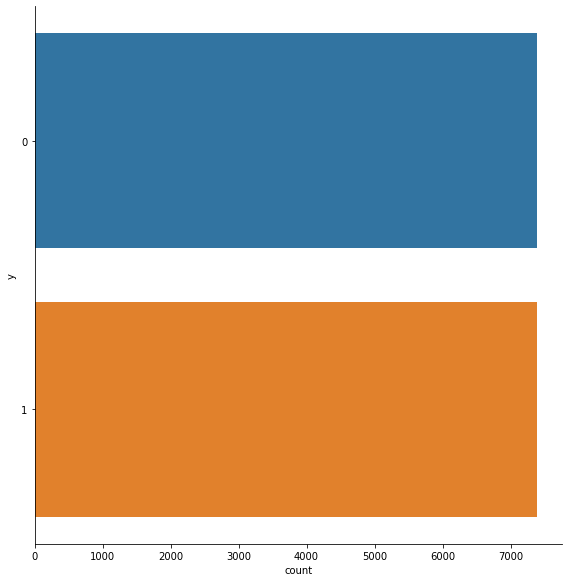

In [23]:
X_train,y_train = sm.fit_sample(X_train,y_train) # balancing the dataset
df_balanced = pd.DataFrame(y_train, columns=["y"])
sb.catplot(y = 'y', data = df_balanced, kind = "count", height = 8)

 - After appling SMOTE, dataset is now balanced equally between y 0 and 1.

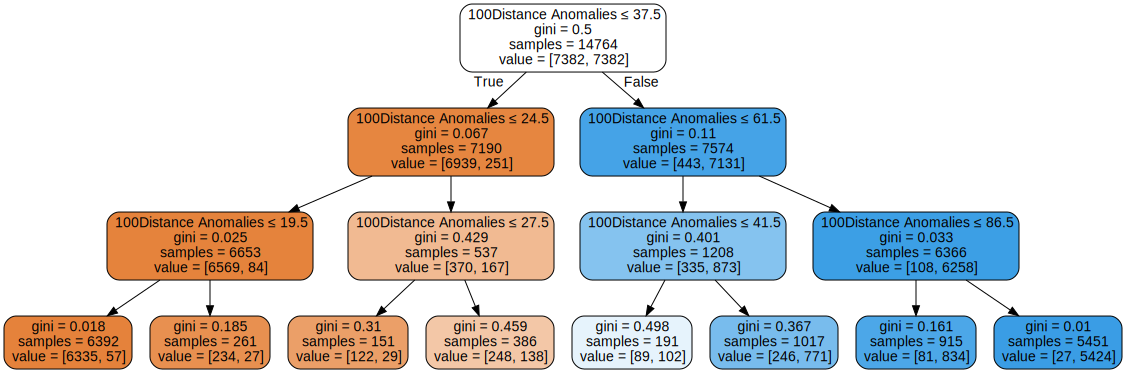

In [24]:
# create new DecisionTreeClassifier object
anomalyTree = DecisionTreeClassifier(max_depth = 3)
anomalyTree.fit(X_train, y_train)
# Visualize using graphviz
from sklearn.tree import export_graphviz
import graphviz
# Create Dot Object from Decision Tree
ca_dot = export_graphviz(anomalyTree, 
                         feature_names = X_train.columns, 
                         out_file = None, filled = True, rounded = True, special_characters = True)
# Render using graphviz
graphviz.Source(ca_dot)

- Anomaly Detection using rolling mean +/- constant of 100

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9529937686263885
False Negative Rate 		: 0.03400162557572473

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9508695652173913
False Negative Rate	 	: 0.03941908713692946



(2.0, 0.0)

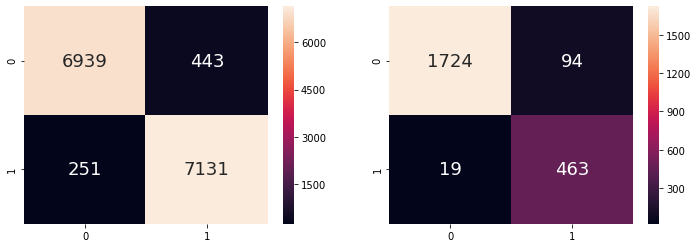

In [25]:
# +/- 100
#Create the confusion matrix

# predict epilepsy for train and test sets
y_train_pred = anomalyTree.predict(X_train)
y_test_pred = anomalyTree.predict(X_test)

ad_fnr_train, ad_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", anomalyTree.score(X_train, y_train))
print("False Negative Rate \t\t:", ad_fnr_train)
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", anomalyTree.score(X_test, y_test))
print("False Negative Rate\t \t:", ad_fnr_test)
print()

ad_acc = anomalyTree.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- Anomaly detection using rolling mean +/- 3 SD

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5
False Negative Rate 		: 0.2932483731019523

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7930434782608695
False Negative Rate	 	: 0.25



(2.0, 0.0)

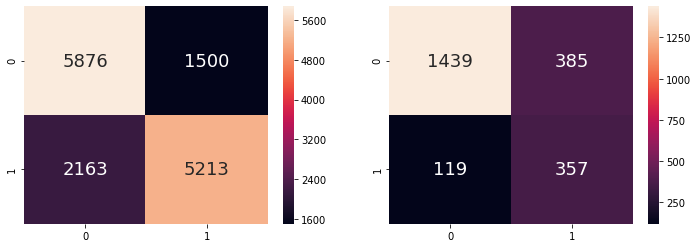

In [26]:
# +/- 3 SD
x = table2.drop(['y'],axis=1)
y = pd.DataFrame(table2['y'])
y = np.array(y).ravel()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.20) # create train and test set based on the anomaly table
X_train,y_train = sm.fit_sample(X_train,y_train) # balance the dataset using smote

anomalyTreeSD = DecisionTreeClassifier(max_depth = 3)
anomalyTreeSD.fit(X_train, y_train)

# predict epilepsy for train and test sets
y_train_pred = anomalyTreeSD.predict(X_train)
y_test_pred = anomalyTreeSD.predict(X_test)
fnr_train,fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", anomalyTree.score(X_train, y_train))
print("False Negative Rate \t\t:", fnr_train)
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", anomalyTree.score(X_test, y_test))
print("False Negative Rate\t \t:", fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Observations**
- **Rolling mean +/- constant** is better at classifying epilepsy than +/- standard deviation in **both metrics** (Classification Accuracy and FNR).
- Thus, for classification, a constant was chosen to set upper and lower bounds over multiple of SD.

# Machine Learning

## Logistic Regression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5801082543978349
False Negative Rate 		: 0.3664411366711773

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5208695652173913
False Negative Rate	 	: 0.4775510204081633



(2.0, 0.0)

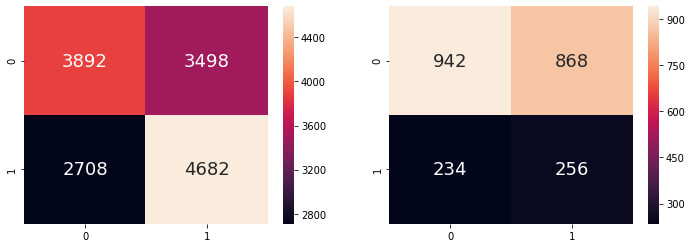

In [27]:
from sklearn.linear_model import LogisticRegression

thresh = 0.5

# Extract Response and Predictors
x = df.drop(['y'],axis=1)
y = pd.DataFrame(df['y'])
y = np.array(y).ravel()

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.20)

# Balance the Dataset
X_train,y_train = sm.fit_sample(X_train,y_train)

lr = LogisticRegression(random_state = 69)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_fnr_train,lr_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(X_train, y_train))
print("False Negative Rate \t\t:", lr_fnr_train)
print()

lr_acc = lr.score(X_test, y_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr.score(X_test, y_test))
print("False Negative Rate\t \t:", lr_fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Gradient Boosting

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9884303112313938
False Negative Rate (Train/Test) 		: 0.013802435723951286

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9669565217391304
False Negative Rate (Train/Test) 	: 0.04081632653061224



(2.0, 0.0)

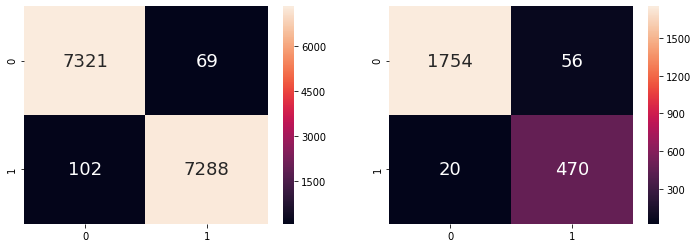

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop(['y'],axis=1)
y = pd.DataFrame(df['y'])

gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=4)
gbc.fit(X_train, y_train)

y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

gbc_fnr_train,gbc_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gbc.score(X_train, y_train))
print("False Negative Rate (Train/Test) \t\t:", gbc_fnr_train)
print()

gbc_acc = gbc.score(X_test, y_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gbc.score(X_test, y_test))
print("False Negative Rate (Train/Test) \t:", gbc_fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## K-Nearest Neighbours

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7910690121786198
False Negative Rate (Train/Test) 	: 0.413531799729364

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9173913043478261
False Negative Rate (Train/Test) 	: 0.36122448979591837



(2.0, 0.0)

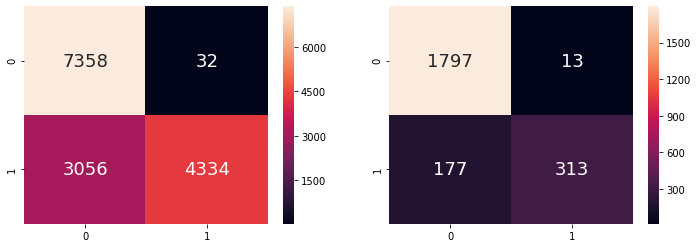

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

y_train_preds = knn.predict_proba(X_train)[:,1]

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn_fnr_train,knn_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn.score(X_train, y_train))
print("False Negative Rate (Train/Test) \t:", knn_fnr_train)
print()

knn_acc = knn.score(X_test, y_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", knn.score(X_test, y_test))
print("False Negative Rate (Train/Test) \t:", knn_fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Observations**
- Logistic regression was the worst model, with the lowest Classifcation Accuracy and highest FNR. 
- Second is KNN, which had the second lowest Classification Accuracy and a higher FNR when compared to the other models of .35 on the test set.
- One possibility for poor results: time series is **dependent** on past variables, while these models use **independent variables as predictors**.
    - In order to solve this problem, must transform time series data into a set of independent variables. This was done through **Fourier transform**.
    - Run the machine learning classification models again using the **FST coefficients** and compare results (part 2: Fourier Series Epilepsy Detection)
    
- In order to draw conclusions on which is the best model for classifying epilepsy, we need to test the models again in the frequency domain.

### Comparing the models

In [30]:
df_results = pd.DataFrame({'Model':['Anomaly Detection','LRM','GBC','KNN'],'Acc':[ad_acc,lr_acc,gbc_acc,knn_acc],'FNR':[ad_fnr_test,lr_fnr_test,gbc_fnr_test,knn_fnr_test]})
df_results.head()

,Model,Acc,FNR
0,Anomaly Detection,0.950870,0.039419
1,LRM,0.520870,0.477551
2,GBC,0.966957,0.040816
3,KNN,0.917391,0.361224


### Visualising the results

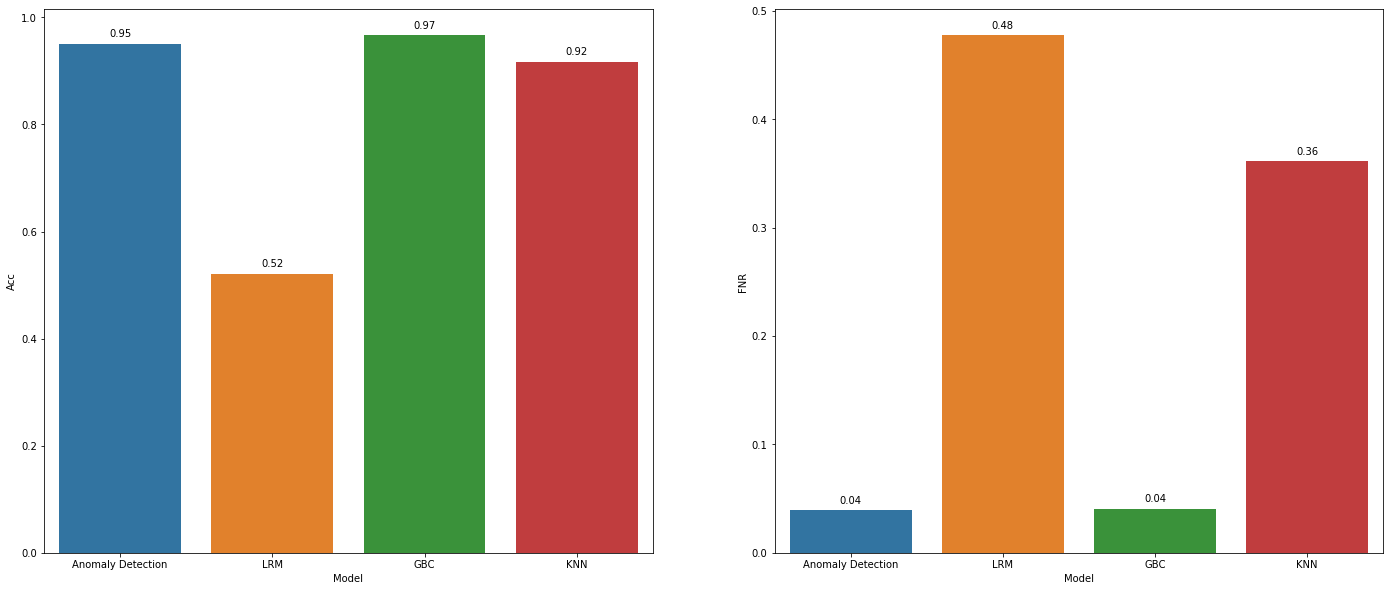

In [31]:
f, axes = plt.subplots(1, 2, figsize=(24, 10))
g = sb.barplot(x = 'Model', y = 'Acc', data = df_results,ax =axes[0])
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
g = sb.barplot(x = 'Model', y = 'FNR', data = df_results,ax =axes[1])
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Sequential Neural Network

In [33]:

# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


from matplotlib import pyplot as plt
plt.imshow(X_train[0])

ModuleNotFoundError: No module named 'keras'